# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

In [59]:
import tensorflow as tf
import numpy as np

In [60]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

Close interactive session


In [61]:
#Set project path 
project_path = "Sarcasm_Headlines_Dataset.json" 

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [62]:
import pandas as pd
tweetDF=pd.read_json(project_path,lines=True)
tweetDF.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [63]:
tweetDF.shape

(28619, 3)

Check nulls

In [64]:
tweetDF.isna().any()

is_sarcastic    False
headline        False
article_link    False
dtype: bool

In [65]:
tweetDF['is_sarcastic'].count()

28619

In [66]:
tweetDF['is_sarcastic'].unique()

array([1, 0], dtype=int64)

Observed 2 unique classes

Balanced class observed in 'is_sarcastic'

In [67]:
tweetDF['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

Average word length in each sentence

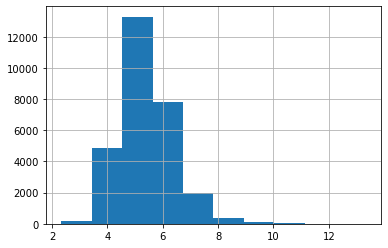

In [68]:
tweetDF['headline'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [69]:
tweetDF=tweetDF.drop('article_link',axis=1)
tweetDF.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [70]:
maxlenH=tweetDF['headline'].apply(len).max()

In [71]:
maxlenH

926

Padding for the headline is done further below after defining x and y for the model

#**## Modelling**

## Import required modules required for modelling.

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [73]:
from tensorflow.python.client import device_lib, session
print(device_lib.list_local_devices())
session.device="GeForce GTX 1650"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7908382089284556824
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3031743692
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14160665311764182012
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [74]:
gpu_options=tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.6)
config=tf.compat.v1.ConfigProto()
# tf.compat.v1.disable_eager_execution()
config.gpu_options.allow_growth=True
session=tf.compat.v1.Session(config=config)

# Set Different Parameters for the model. ( 2 marks)

In [75]:
max_features = 10000
maxlen =maxlenH
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [76]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions:
        [all_desc.update(key.split())]
    return all_desc

# summarize vocabulary
texts = tweetDF['headline'].values
vocabulary = to_vocabulary(texts)
num_words=len(vocabulary)
print('Original Vocabulary Size: %d' % len(vocabulary))
num_words=28619


Original Vocabulary Size: 38234


In [77]:
type(vocabulary)

set

In [78]:
from tensorflow.keras.preprocessing.text import Tokenizer

tk = Tokenizer(num_words=28619)
tk.fit_on_texts(texts)


In [79]:
texts

array(['thirtysomething scientists unveil doomsday clock of hair loss',
       'dem rep. totally nails why congress is falling short on gender, racial equality',
       'eat your veggies: 9 deliciously different recipes', ...,
       'the most beautiful acceptance speech this week came from a queer korean',
       'mars probe destroyed by orbiting spielberg-gates space palace',
       'dad clarifies this not a food stop'], dtype=object)

# Define X and y for your model.

In [80]:
X = tk.texts_to_sequences(texts)
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(tweetDF['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[1])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [81]:
type(tk.word_index)

dict

In [82]:
r=tk.num_words
print('Vocubulary size: %d'%r)

Vocubulary size: 28619


#**## Word Embedding**

## Get Glove Word Embeddings

In [23]:
# glove_file = glove_6B + "glove.6B.zip"
glove_file = "glove.6B.zip"

In [24]:
#Extract Glove embedding zip file
# from zipfile import ZipFile
# with ZipFile(glove_file, 'r') as z:
#   z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [25]:
import os
glove_dir = ''

embeddings = {}
for o in open('glove.6B.200d.txt', encoding="utf-8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd


In [26]:
len(embeddings)

400000

# Create a weight matrix for words in training docs

In [27]:
embedding_size=200
embedding_matrix = np.zeros((r, embedding_size))
embedding_matrix
for word, i in tk.word_index.items():
    
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None and i<r:
        embedding_matrix[i] = embedding_vector
           
embedding_matrix.shape

(28619, 200)

In [114]:
len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [115]:
### Embedding layer for hint 
model=Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
# model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25,name='drop_1'))
model.add(Dense(1, activation='sigmoid'))

In [116]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 200)         5723800   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
drop_1 (Dropout)             (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 6,093,721
Trainable params: 6,093,721
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [118]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

In [119]:
X.shape

(28619, 926)

In [120]:
y.shape

(28619,)

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, 
    random_state=42
)

In [123]:
X_train.shape

(22895, 926)

In [124]:
X_test.shape

(5724, 926)

In [125]:
y_train.shape

(22895,)

In [126]:
y_test.shape

(5724,)

In [127]:
batch_size = 100
epochs = 5

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=callback_list)
# print("model accuracy :" , accuracy)

Train on 18316 samples, validate on 4579 samples
Epoch 1/5
18316/18316 [==============================] - 866s 47ms/sample - loss: 0.4495 - acc: 0.7798 - val_loss: 0.3490 - val_acc: 0.8458
Epoch 2/5
18316/18316 [==============================] - 881s 48ms/sample - loss: 0.2376 - acc: 0.9059 - val_loss: 0.3123 - val_acc: 0.8696
Epoch 3/5
18316/18316 [==============================] - 902s 49ms/sample - loss: 0.4801 - acc: 0.8264 - val_loss: 0.3904 - val_acc: 0.8482
Epoch 4/5
18316/18316 [==============================] - 909s 50ms/sample - loss: 0.1434 - acc: 0.9478 - val_loss: 0.3957 - val_acc: 0.8537
Epoch 5/5
18316/18316 [==============================] - 906s 49ms/sample - loss: 0.0638 - acc: 0.9806 - val_loss: 0.5356 - val_acc: 0.8508


In [147]:
import matplotlib.pyplot as plt

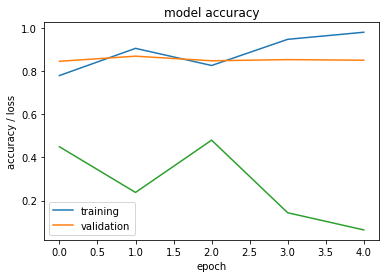

In [151]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [130]:
print('Training results: %s'%(history.history))

Training results: {'loss': [0.449532823124992, 0.23763596803294854, 0.48006355422250985, 0.1433787902702825, 0.06375302092017018], 'acc': [0.7797554, 0.90587467, 0.8263813, 0.9477506, 0.98061806], 'val_loss': [0.34900075256447, 0.3122919396779818, 0.39035590537434245, 0.39574765473064, 0.5356109691228531], 'val_acc': [0.84581786, 0.8696222, 0.8482201, 0.85367984, 0.8508408]}


In [131]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)

5724/5724 [==============================] - 146s 25ms/sample - loss: 0.4752 - acc: 0.8644
[0.47516599994160597, 0.8644305]


In [140]:
print('The test accuracy is %s'%(loss_and_metrics[1]*100))

The test accuracy is 86.44304871559143
